<a href="https://colab.research.google.com/github/thakurnimesh107/Recommendation-System/blob/main/Book_Recommendation_Web_Crawler_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name: Book Recommendation System: ML Capstone Project IV**

##**Project Summary**

This project is all about recommendation system. Recommendation systems are built to predict what users might like, especially when there are lots of choices available. They can explicitly offer those recommendations to users or they might work behind the scenes to choose which content to surface without giving the user a choice. A book recommendation system is designed to recommend books of interest to the buyer. Our first recommender is popularity based where we have most popular books, Author and Publisher. The recommendation was built using different algorithms such as Collaborative filtering-based recommendation, User-based filtering, Item based filtering, Model Based Collaborative Filtering Recommender.

**Data preparation & Visualization:**

We started with importing all the important libraries to help us explore the problem statement, perform EDA to draw conclusion on the basis of the data set, implemented recommender system algorithms and evaluation metrics.

Our next step was to perform data wrangling over the raw data. It started with 3 different data set.

•	Shape of books dataset: (271360, 8)

•	Shape of ratings dataset: (1149780, 3)

•	Shape of user dataset: (278858, 3)


*We had to clean the data one by one. & then we merged all three data in one data frame.

*After all the processing of the data, we get 383841 rows and 10 columns.

*Preprocessing data.

*EDA

**Model Building:**

Popularity Based Recommendation: Here we are recommending books on these 3 criteria:

•	Most Popular Books

•	Most Popular Author

•	Most popular Publisher

In popularity-based recommendation, it’s noticed that most popular book and author represent Publisher Scholastic. Also, Scholastic is most popular publisher to receive maximum positive rating. However, Scholastic is 6th publisher with maximum books.

Collaborative filtering-based recommendation: Here we have 2 ways.

•	User Based Filtering

•	Item Based Filtering

It primarily makes recommendations based on inputs or actions from other people (rather than only the user for whom a recommendation is being made).

**Model Based Collaborative Filtering Recommender:** 

Model-based collaborative filtering algorithms provide item recommendation by first developing a model of user ratings.
The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results. We got much better results with SVD approach - both in terms of accuracy and training / testing time.

For modelling, it was observed that for model based collaborative filtering SVD technique worked way better than NMF with lower Mean Absolute Error (MAE).



# **TEAM MEMBER**


1.  NIMESH THAKUR(thakurnimesh107@gmail.com)

Data Wrangling,Data preprocessing,INputing missing value,Outlier treatment,Performed EDA,recommendation moddel

##**Github Link:**
https://github.com/thakurnimesh107/Recommendation-System

## **Problem Statement**

### During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

### In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## **Data Description**

The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load dataset
data1 = pd.read_csv('/content/drive/MyDrive/ML unsupervised BOOK RECOMMENDATION /Books.csv')
data2 = pd.read_csv('/content/drive/MyDrive/ML unsupervised BOOK RECOMMENDATION /Users.csv')
data3 = pd.read_csv('/content/drive/MyDrive/ML unsupervised BOOK RECOMMENDATION /Ratings.csv')

In [4]:
# creating a copy of data
books = data1.copy()
users = data2.copy()
ratings = data3.copy()

In [5]:
# checking shape of data
print(f"Shape of books data: {books.shape}")
print(f"Shape of ratings data : {ratings.shape}")
print(f"Shape of users data: {users.shape}")

Shape of books data: (271360, 8)
Shape of ratings data : (1149780, 3)
Shape of users data: (278858, 3)


# **Let's start with Books data.**

In [6]:
# checking first 5 row
print("Columns: ", list(books.columns))
books.head()

Columns:  ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
# Drop URL columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [8]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for num,col in enumerate(books.columns,1):
    print('\n')
    print(num,')\n','{} : {}'.format(col,books[col].unique()))



1 )
 ISBN : ['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752']


2 )
 Book-Title : ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]


3 )
 Book-Author : ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']


4 )
 Year-Of-Publication : [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1

In [9]:
# Books data info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


**Year of publication's data type is object, it should be int. We'll need to check this**.   

In [10]:
# Checking for null values
books.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

**2 values are missing from Publishers column and 1 from Book-Author. Lets fill this with "other". **

In [11]:
# Replacing missing values with "other"
books["Book-Author"].fillna("other", inplace = True)  
books["Publisher"].fillna("other", inplace = True)  

In [12]:
# To count the duplicated values 
books.duplicated().value_counts()

False    271360
dtype: int64

In [13]:
# Checking unique values
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102024
Year-Of-Publication       202
Publisher               16808
dtype: int64

In [14]:
# Checking 5 random rows
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
91599,0850309689,The Ancient Egyptian Tarot (An Aquarian Book),Clive Barrett,1995,Thorsons Pub
103593,037376233X,Rio: Man Of Destiny (The Blaylocks) (Silhouett...,Cait London,1999,Silhouette
94830,0758205503,Beyond Desire,Thea Devine,2003,BRAVA
205901,0292787065,Volcanoes of the Earth (The Dan Danciger publi...,Fred Mason Bullard,1984,Univ of Texas Pr
266127,0865714622,Cruise Ship Blues : The Underside of the Cruis...,Ross A. Klein,2002,Consortium


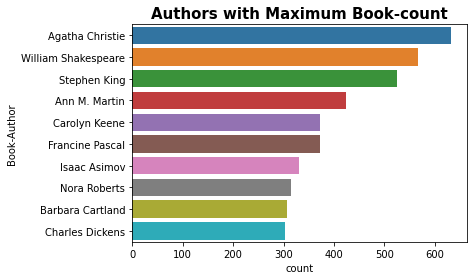

In [15]:
# Authors with Maximum Book-count
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Authors with Maximum Book-count',fontsize=15,fontweight='bold')

plt.show()

**As per our data, Agatha Christie released maximums books. Then we have William Shakespeare and Stephen King**

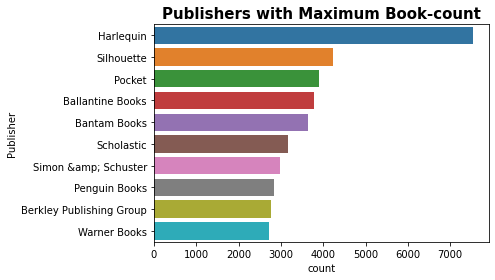

In [16]:
# Publishers with Maximum Book-count
sns.countplot(y='Publisher', data=books, order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Publishers with Maximum Book-count',fontsize=15,fontweight='bold')
plt.show()

**Maximum numner of books pulblised by Hariequin, Silhouette and Pocket**

Since we had data type of year-of-publication as object. Now we'll look at it. 

In [17]:
# Checking year-of-publication values
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')
a=list(books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


Here, we found some irrelevant data.

1.   DK Publishing and Gallimard are Publishers. 
2.   0 can't be a year of publishing


In [18]:
#We see the books with publishing year as 0
print(books.loc[books['Year-Of-Publication']=='0'])

              ISBN                                         Book-Title  \
176     3150000335                                   Kabale Und Liebe   
188     342311360X                            Die Liebe in Den Zelten   
288     0571197639                        Poisonwood Bible Edition Uk   
351     3596214629       Herr Der Fliegen (Fiction, Poetry and Drama)   
542     8845229041  Biblioteca Universale Rizzoli: Sulla Sponda De...   
...            ...                                                ...   
270794  014029953X                         Foe (Essential.penguin S.)   
270913  0340571187                                     Postmens House   
271094  8427201079                           El Misterio De Sittaford   
271182  0887781721                                          Tom Penny   
271196  3150013763                                     Der Hofmeister   

                   Book-Author Year-Of-Publication  \
176                   Schiller                   0   
188     Gabriel

In [19]:
#investigating the rows having 'DK Publishing Inc' as Year-Of-Publication
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [21]:
#From above, it is seen that bookAuthor is incorrectly loaded with book-title, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"


# Rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [22]:
# Investigating the rows having 'Gallimard' as year-of-publication
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [23]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [24]:
# Year-Of-Publication is in object we are converting it into integer format
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

print(sorted(books['Year-Of-Publication'].unique()))
## Now all Year-Of-Publication entries are year wise as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


The value 0 for Year-Of_Publication is invalid. 
Since current year is 2022, we have assumed that the years after 2022 to be 
invalid and setting invalid years as NaN. So that it can be treated with missing values. 

In [25]:
# Replacing invalid year with NaN
books.loc[(books['Year-Of-Publication'] > 2022) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [26]:
# Replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()),inplace=True)

In [27]:
# Cross-checking our data
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

## **Rating**

In [28]:
# Checking first 5 row
print("Columns: ", list(ratings.columns))
ratings.head()

Columns:  ['User-ID', 'ISBN', 'Book-Rating']


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [29]:
# Checking 5 random rows
ratings.sample(5)

,User-ID,ISBN,Book-Rating
9757,183,18128/87,7
367227,88229,0060916680,0
1146344,275970,0060958324,0
212891,49460,0449910644,0
112877,26138,0140282033,0


In [30]:
# Rating data info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [31]:
# Checking for null values
ratings.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [32]:
# To count the duplicated values 
ratings.duplicated().value_counts()

False    1149780
dtype: int64

In [33]:
# Checking unique values
ratings.nunique()


User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

Unique values for rating is coming 11. As we have Implict rating (0-10) and Explict ratings (1-10). 

In [34]:
# Checking 11 rating values
book_rating = ratings['Book-Rating'].unique()
book_rating

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

Text(0.5, 1.0, 'Implicit Ratings')

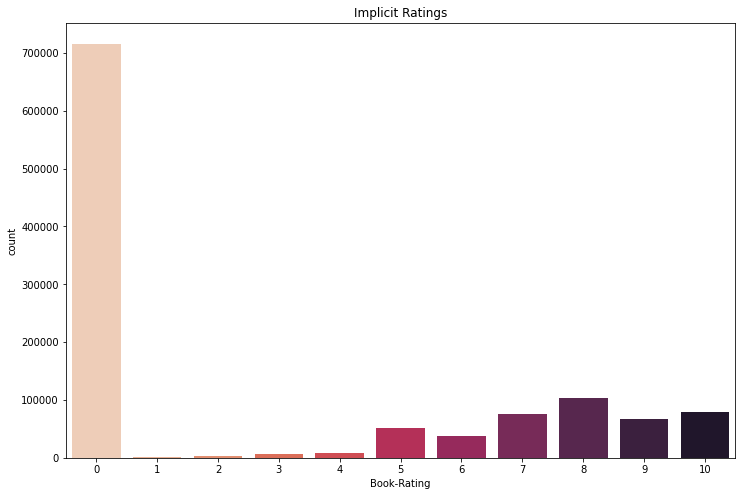

In [35]:
# Plotting Implict rating
plt.figure(figsize=(12,8))
sns.countplot(x="Book-Rating", data=ratings, palette='rocket_r')
plt.title("Implicit Ratings")

The ratings are very unevenly distributed, and the vast majority of ratings are 0. As mentoined in the description of the dataset Rating, Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence seprate implicit and explict ratings datasets

In [36]:
# Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings[ratings['Book-Rating'] != 0]
ratings_implicit = ratings[ratings['Book-Rating'] == 0]

Text(0.5, 1.0, 'Explicit Ratings')

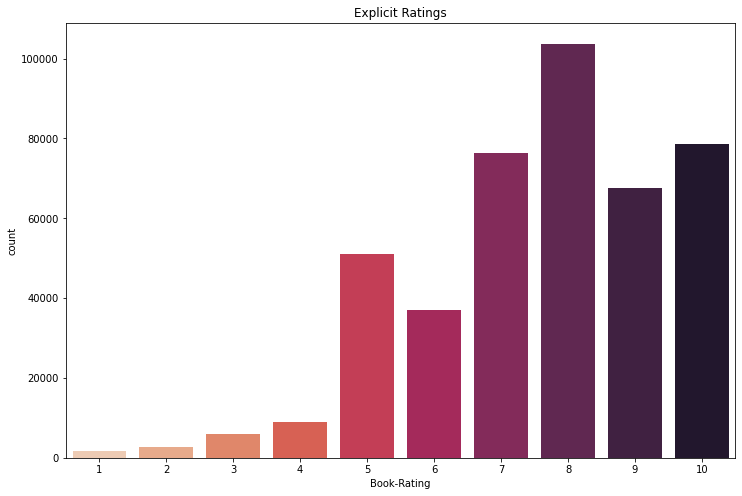

In [37]:
plt.figure(figsize=(12,8))
ratings_explicit = ratings[ratings['Book-Rating'] != 0]

sns.countplot(x="Book-Rating", 
              data=ratings_explicit,
              palette='rocket_r')

plt.title("Explicit Ratings")

Higher ratings are more common among users and rating 8 has been rated highest number of times

In [38]:
# Checking rating count per books
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333


# **User data**

In [39]:
# top 5 rows
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [40]:
# 5 rows from bottom
users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [41]:
# User data info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [42]:
# Checkig null values exist in user data
users.isnull().sum() 

User-ID          0
Location         0
Age         110762
dtype: int64

In [43]:
# data description 
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


We have a lot of missing values in age column. Maximum age is 244 and minimun is 0. We need to fix this. 

In [44]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

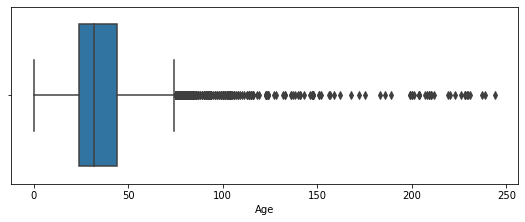

In [45]:
# Checking outliers
fig = plt.figure(figsize=(20,15))
plt.subplot(4, 2, 2)
# plt.xlabel('Distibution of {}'.format(i))
sns.boxplot(x='Age',data=users)

Text(0.5, 1.0, 'Age Distribution Plot')

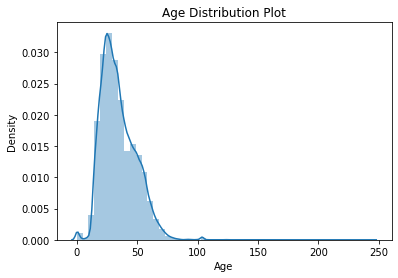

In [46]:
# Checking data distribution from distplot
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

**We have outliers in Age column.**

In [47]:
# Dealing with outliers
median = float(users['Age'].median())
users["Age"] = np.where(users["Age"] > 80, median, users['Age'])

In [48]:
# dealing with missing values
users["Age"].fillna(users.Age.mean(),inplace=True)

Missing values has been filled with mean values of Age column


In [49]:
# Checking location
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [50]:
# Unique values in location column
users.Location.nunique()

57339

In [51]:
# removing special character from location column
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')  

In [52]:
# Checking null values
users.isnull().sum()

User-ID       0
Location      0
Age           0
Country     368
dtype: int64

In [53]:
# Converting country column d-ype from object to string
users['Country']=users['Country'].astype('str')

In [54]:
# Checking countries
country_name  =list(users.Country.unique())
country_name =set(country_name)
country_name =list(country_name)
country_name = [x for x in country_name if x is not None]
country_name.sort()
print(country_name)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

Need to correct some missspelled words and fill blanks with "other".

In [55]:
# Correct missspelled words
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda', 'canada eh','china öð¹ú', 'chinaöð¹ú','geermany','italia', 'indiai','itlay', 'philippine', 'philippines', 'philippinies','unite states','united kindgdom','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','canada', 'china', 'china','germany','italy', 'india','italy','philippines', 'philippines', 'philippines','united kingdom','usa','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

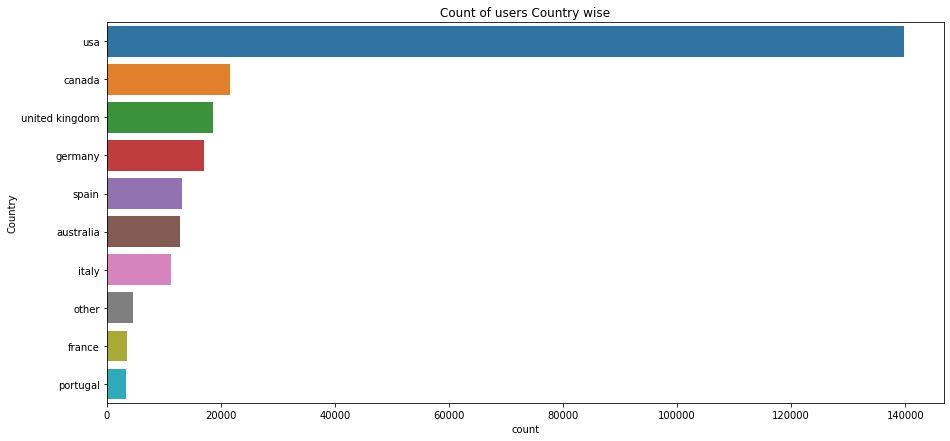

In [56]:
# Country-wise users
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

**Maximum users are from USA followed by Canada and United Kingdom.**

# **Merge Dataset: Books, Users**

We are done with preprocessing and analysing all 3 data individually. Now we'll merge them togeather, perform multivariate analysis and build models. 

In [57]:
# Merging all 3 datasets
df = users.copy()
df = pd.merge(df, ratings_explicit, on="User-ID")
df = pd.merge(df, books, on="ISBN")

Now we have our final dataset called "df". It has all the columns provided in 3 data sets indivisually. 

In [58]:
# Lets chck data
df.head()

,User-ID,Location,Age,Country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,"timmins, ontario, canada",34.491535,canada,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,"n/a, n/a, n/a",34.491535,nan,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,"toronto, ontario, canada",30.000000,canada,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,"ottawa, ,",34.491535,other,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,"kingston, ontario, canada",34.491535,canada,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [59]:
df.describe()

,User-ID,Age,Book-Rating,Year-Of-Publication
count,383842.000000,383842.000000,383842.000000,383842.000000
mean,136031.461260,35.871149,7.626701,1995.706330
std,80482.299401,10.330571,1.841339,7.380866
min,8.000000,0.000000,1.000000,1376.000000
25%,67591.000000,31.000000,7.000000,1993.000000
50%,133789.000000,34.491535,8.000000,1997.000000
75%,206219.000000,40.000000,9.000000,2001.000000
max,278854.000000,80.000000,10.000000,2021.000000


In [60]:
# Checking null values
df.isnull().sum()

User-ID                0
Location               0
Age                    0
Country                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [61]:
# Merge data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              383842 non-null  int64  
 1   Location             383842 non-null  object 
 2   Age                  383842 non-null  float64
 3   Country              383842 non-null  object 
 4   ISBN                 383842 non-null  object 
 5   Book-Rating          383842 non-null  int64  
 6   Book-Title           383842 non-null  object 
 7   Book-Author          383842 non-null  object 
 8   Year-Of-Publication  383842 non-null  float64
 9   Publisher            383842 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 32.2+ MB


Our final data is clean. We don't have missing values here.

Since we have rating given by users. We can focus on demand and choice of customers/user with user rating. 

##**Author V/S Ratings**

In [62]:
# ratings count per author
auth_rating=df.groupby(['Book-Author'])['Book-Rating'].count().sort_values(ascending=False).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

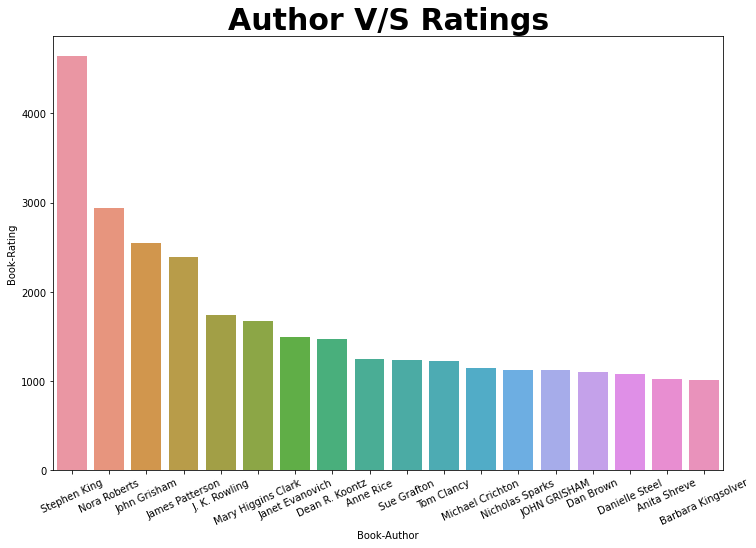

In [63]:
plt.figure(figsize=(12,8))
ax=sns.barplot(auth_rating[auth_rating['Book-Rating']>1000]['Book-Author'],auth_rating[auth_rating['Book-Rating']>1000]['Book-Rating'])
ax.set_title('Author V/S Ratings', fontsize=30,fontweight='bold')
plt.xticks(fontsize=10,rotation=25)

**Stephen King has received maximum number of rating by the users. It seems he is more popular among readers followed by Nora Roberts and John Grisham**

##**Book V/S Ratings**

In [65]:
#Book ratings count using group by
book_rating=df.groupby(['Book-Title'])['Book-Rating'].count().sort_values(ascending=False).reset_index()

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text major ticklabel objects>)

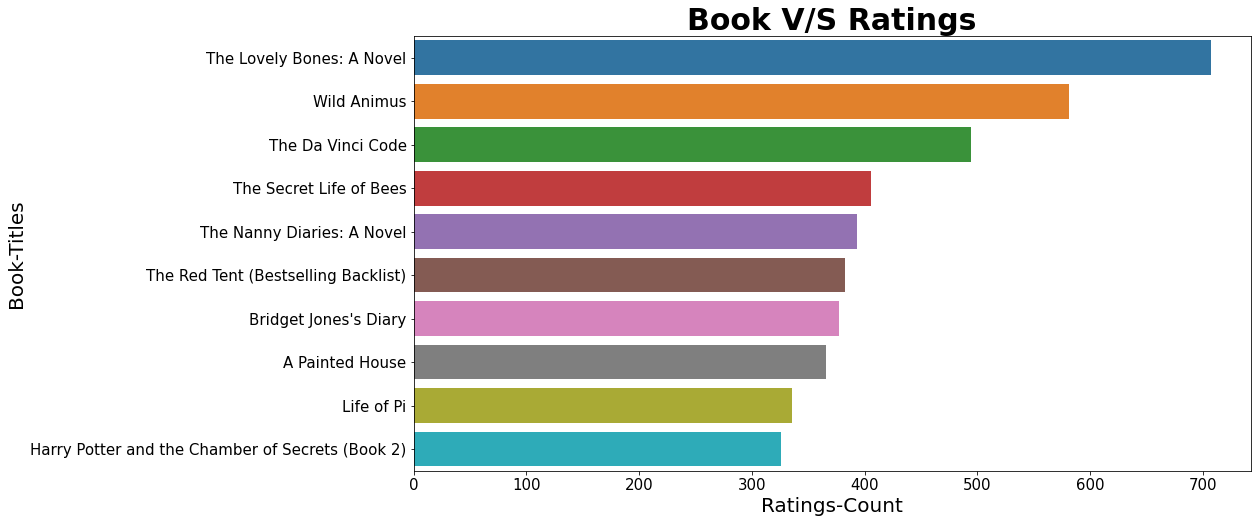

In [66]:
plt.figure(figsize=(15,8))
ax=sns.barplot(book_rating['Book-Rating'][:10],book_rating['Book-Title'][:10])
ax.set_title('Book V/S Ratings', fontsize=30,fontweight='bold')
ax.set_xlabel('Ratings-Count',fontsize=20)
ax.set_ylabel('Book-Titles',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

**Top-10 most rated books were essentially novels. Books like The Lovely Bone and Wild Animus were very well perceived.**

#**Publisher V/S Ratings**

In [67]:
#Book ratings count using group by
publisher_rating=df.groupby(['Publisher'])['Book-Rating'].count().sort_values(ascending=False).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

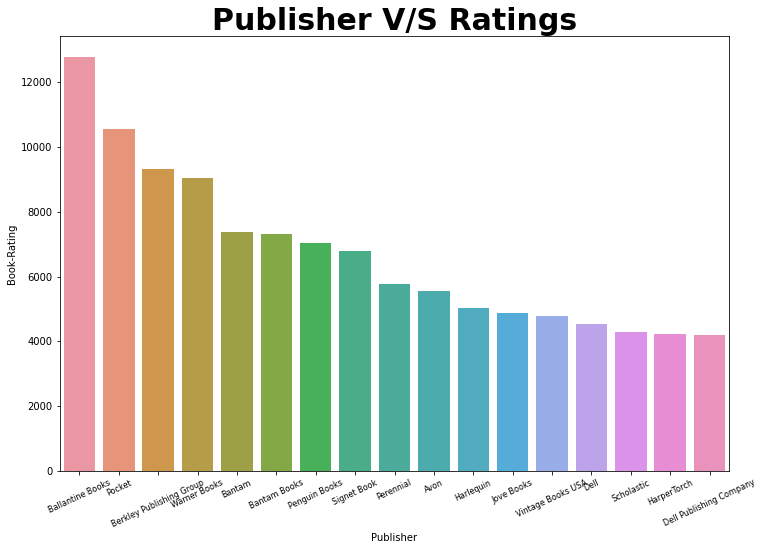

In [68]:
plt.figure(figsize=(12,8))
ax=sns.barplot(publisher_rating[publisher_rating['Book-Rating']>4000]['Publisher'],publisher_rating[publisher_rating['Book-Rating']>3000]['Book-Rating'])
ax.set_title('Publisher V/S Ratings', fontsize=30,fontweight='bold')
plt.xticks(fontsize=8,rotation=25)

**Here we have top-10 most rated Publishers. Ballantine Books received maximum attention by the users followed by Rocket and Barkley Publishing Group.**

This is all about our data. We have some important and meaningful insights here.

Now we'll move toward Recommendation sytem. We are going to start with popular stuff like most popular book, author and publisher. The best part here is rating of books. Though we don't have rating for all the books but still we have enough information to check popularity. 

# **Popularity based recommendation**

# **Top 20 Popular Books**

In [69]:
# Creating a data with book title and rating
num_rating_df = df.groupby("Book-Title").count()["Book-Rating"].reset_index()       # here we have actual rating
num_rating_df.rename (columns = {'Book-Rating': 'num_rating'},inplace = True)

avg_rating_df = df.groupby("Book-Title").mean()["Book-Rating"].reset_index()        # here we have average rating
avg_rating_df.rename (columns = {'Book-Rating': 'avg_rating'},inplace = True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,7.000000
135564,Ã?Â?sterlich leben.,7.000000
135565,Ã?Â?stlich der Berge.,8.000000


In [70]:
# storing num rating and average rating in popular df
popular_df = num_rating_df.merge(avg_rating_df, on="Book-Title")
popular_df 

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135564,Ã?Â?sterlich leben.,1,7.000000
135565,Ã?Â?stlich der Berge.,1,8.000000


In [71]:
# Fetch those books on which more than 250 users have rated. 
popular_df = popular_df[popular_df["num_rating"]>=250].sort_values("avg_rating", ascending=False).head(20)

In [72]:
popular_df = popular_df.merge(df, on= "Book-Title").drop_duplicates("Book-Title")[["Book-Title", "avg_rating", "ISBN", "Book-Author","Year-Of-Publication", "Publisher" ]]
popular_df

,Book-Title,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher
0,Harry Potter and the Prisoner of Azkaban (Book 3),9.043321,0439136350,J. K. Rowling,1999.0,Scholastic
277,To Kill a Mockingbird,8.977528,0446310786,Harper Lee,1988.0,Little Brown &amp; Company
544,Harry Potter and the Sorcerer's Stone (Harry P...,8.936508,059035342X,J. K. Rowling,1999.0,Arthur A. Levine Books
859,Harry Potter and the Chamber of Secrets (Book 2),8.840491,0439064864,J. K. Rowling,1999.0,Scholastic
1185,"Tuesdays with Morrie: An Old Man, a Young Man,...",8.588000,0385484518,MITCH ALBOM,1997.0,Doubleday
1435,The Secret Life of Bees,8.477833,0142001740,Sue Monk Kidd,2003.0,Penguin Books
1841,The Da Vinci Code,8.439271,0385504209,Dan Brown,2003.0,Doubleday
2335,The Lovely Bones: A Novel,8.185290,0316666343,Alice Sebold,2002.0,"Little, Brown"
3042,The Red Tent (Bestselling Backlist),8.182768,0312195516,Anita Diamant,1998.0,Picador USA
3425,Where the Heart Is (Oprah's Book Club (Paperba...,8.142373,0446672211,Billie Letts,1998.0,Warner Books


**This is first recommender. Here, we have got top 20 books. On 



which 250+ users have rated. Maximum rating is 10 and minimum is 7 .

We have check this by giving different numbers of user's rating. 250 was found to be the  best number. Hence, we continued with 250 users. 

# **20 Popular Authors**

In [75]:
# Creating a data with Author and Book-Rating
author_rating_df = df.groupby("Book-Author").count()["Book-Rating"].reset_index()       # Autual  rating 
author_rating_df.rename (columns = {'Book-Rating': 'author_rating'},inplace = True)

avg_rating_author = df.groupby("Book-Author").mean()["Book-Rating"].reset_index()       # Average rating
avg_rating_author.rename (columns = {'Book-Rating': 'avg_rating_author'},inplace = True)
avg_rating_author

,Book-Author,avg_rating_author
0,D. Chiel,10.0
1,Mimma Balia,8.0
2,142 moms from all over the world,5.0
3,73 Magazine Editors,6.0
4,";Katie Stewart""",9.0
...,...,...
62108,x x,8.0
62109,Â¢ystein LÂ²nn,7.0
62110,Ã?dÃ¶n von HorvÃ¡th,8.0
62111,Ã?Â?dÃ?Â¶n von Horvath,10.0


In [76]:
# Fetching details of authors. Here more than 900 users have rated on these author's books. 
popular_author = avg_rating_author.merge(author_rating_df, on="Book-Author")
popular_author = popular_author[popular_author["author_rating"]>=900].sort_values("avg_rating_author", ascending=False)
popular_author = popular_author.merge(df, on= "Book-Author").drop_duplicates("Book-Author")[["Book-Title", "avg_rating_author", "ISBN", "Book-Author","Year-Of-Publication", "Publisher" ]]
popular_author

,Book-Title,avg_rating_author,ISBN,Book-Author,Year-Of-Publication,Publisher
0,Harry Potter and the Chamber of Secrets (Book 2),8.970218,0439064864,J. K. Rowling,1999.0,Scholastic
1746,Pigs in Heaven,8.195437,0060168013,Barbara Kingsolver,1993.0,Harpercollins
2754,The Lovely Bones: A Novel,8.171336,0316666343,Alice Sebold,2002.0,"Little, Brown"
3682,Angels &amp; Demons,8.116848,0671027360,Dan Brown,2001.0,Pocket Star
4786,Full House,7.944966,1559277785,Janet Evanovich,2002.0,Audio Renaissance
6276,The Dark Half,7.815046,0451167317,Stephen King,1994.0,Signet Book
10915,The Rescue,7.739169,0446610399,Nicholas Sparks,2001.0,Warner Books
12046,B Is for Burglar (Kinsey Millhone Mysteries (P...,7.722267,0553280341,Sue Grafton,1986.0,Bantam
13281,The Beach House,7.697947,0446612545,James Patterson,2003.0,Warner Books
15668,The Street Lawyer,7.640179,0440225701,JOHN GRISHAM,1999.0,Dell


In [77]:
popular_author.shape

(20, 6)

**Here, we have got 20 books. On which 900 users have rated. Maximum average rating is 8 and minimum is 7.**

We have check this also by giving different numbers of user's rating. At 900 we have got perfect output. Hence, we are continuing with this. 
Although this trend will keep changing by the time when we'll add on more data. There could be minor changes also.  But for now they are the 20 most popular Authors. 

# **20 Popular Publisher**

In [78]:
pub_rating_df = df.groupby("Publisher").count()["Book-Rating"].reset_index()
pub_rating_df.rename (columns = {'Book-Rating': 'pub_rating'},inplace = True)

avg_rating_pub = df.groupby("Publisher").mean()["Book-Rating"].reset_index()
avg_rating_pub.rename (columns = {'Book-Rating': 'avg_rating_pub'},inplace = True)

popular_pub = avg_rating_pub.merge(pub_rating_df, on="Publisher")
popular_pub = popular_pub[popular_pub["pub_rating"]>=3400].sort_values("avg_rating_pub", ascending=False).head(20)
popular_pub = popular_pub.merge(df, on= "Publisher").drop_duplicates("Publisher")[["Book-Title", "Book-Rating", "ISBN", "Book-Author","Year-Of-Publication", "Publisher" ]]
popular_pub


,Book-Title,Book-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher
0,Tell Me This Isn't Happening,5,0439095026,Robynn Clairday,1999.0,Scholastic
4284,"My First Cousin Once Removed: Money, Madness, ...",4,0060930365,Sarah Payne Stuart,1999.0,Perennial
10059,McDonald's: Behind the Arches,9,0553347594,John F. Love,1995.0,Bantam
17442,Snow Angels,8,0140250964,Stewart O'Nan,1995.0,Penguin Books
24462,A Judgement in Stone,8,0375704965,Ruth Rendell,2000.0,Vintage Books USA
29232,Rebecca,10,0380778556,Daphne Du Maurier,1994.0,Avon
34797,Airframe,9,0345402871,Michael Crichton,1997.0,Ballantine Books
47578,Fast Women,8,0312252617,Jennifer Crusie,2001.0,St. Martin's Press
51029,The Pillars of the Earth,3,0451166892,Ken Follett,1996.0,Signet Book
57804,This Year It Will Be Different: And Other Stories,8,0440223571,Maeve Binchy,1997.0,Dell


**Here, we have got 20 books from different publishers. More than 3400 users have rated on the books published by these 20 Publishers.**

We have check this also by giving different numbers of user's rating. At 3400, we have got most appropriate output. Hence, we are continuing with this. 
Although this trend will keep changing by the time when we'll add on more data. There could be minor changes also.  But for now they are the Top 20 Publishers according to users rating. 

# **Collaborative filtering based recommendation.**

**User Based Filtering**

In [79]:
# Creating a data of user id and book-rating
x = df.groupby('User-ID').count()["Book-Rating"]>150

# boolean indexing. Extracting true values only.
# Experienced users are those who have rated more than 150 books

experienced_user = x[x].index

In [80]:
# filtered_rating - only data with all the details where a single user has rated more than 150 books
filtered_rating = df[df['User-ID'].isin(experienced_user)]
filtered_rating 

,User-ID,Location,Age,Country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,11676,"n/a, n/a, n/a",34.491535,nan,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
22,11676,"n/a, n/a, n/a",34.491535,nan,0452264464,8,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume
51,102359,"springfield, oregon, usa",34.491535,usa,0452264464,10,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume
55,105517,"calgary, alberta, canada",28.000000,canada,0452264464,1,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume
61,129716,"tallahassee, florida, usa",30.000000,usa,0452264464,10,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume
...,...,...,...,...,...,...,...,...,...,...
382763,274301,"frankston, victoria, australia",41.000000,australia,0890879559,10,Bestfeeding: Getting Breastfeeding Right for You,Mary Renfrew,2000.0,Celestial Arts
382764,274301,"frankston, victoria, australia",41.000000,australia,1564140784,7,Manage Your Time (Ron Fry's How to Study Program),Ron Fry,1994.0,Career Press
382765,274301,"frankston, victoria, australia",41.000000,australia,156924488X,10,More Secrets of Happy Children: Embrace Your P...,Steve Biddulph,2003.0,Marlowe &amp; Company
382766,274301,"frankston, victoria, australia",41.000000,australia,1879237806,10,Postpartum Survival Guide,Ann Dunnewold,1994.0,New Harbinger Publications


We have total data of 383842.However 74513 users are thoes who have rated books. Rest have never rated on any single book. Till here we have filtered based on user. In next step, we will filter the data based on books.

**Item Based Filtering**

In [81]:
# Creating a data of Book-Title and book-rating
y = filtered_rating.groupby("Book-Title").count()["Book-Rating"]>=10
y[y]

Book-Title
1984                                                                                                   True
1st to Die: A Novel                                                                                    True
2nd Chance                                                                                             True
84 Charing Cross Road                                                                                  True
A Bend in the Road                                                                                     True
                                                                                                       ... 
Winter Solstice                                                                                        True
Wizard and Glass (The Dark Tower, Book 4)                                                              True
Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players    True
Zen and the Art o

In [82]:
# Boolean indexing. Extracting true values only.
famous_book = y[y].index
famous_book

Index(['1984', '1st to Die: A Novel', '2nd Chance', '84 Charing Cross Road',
       'A Bend in the Road', 'A Confederacy of Dunces (Evergreen Book)',
       'A Great Deliverance',
       'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
       'A Knight in Shining Armor', 'A Painted House',
       ...
       'White Oleander : A Novel',
       'White Oleander : A Novel (Oprah's Book Club)',
       'Wicked: The Life and Times of the Wicked Witch of the West', 'Wifey',
       'Wild Animus', 'Winter Solstice',
       'Wizard and Glass (The Dark Tower, Book 4)',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=366)

In [83]:
filtered_rating[filtered_rating["Book-Title"].isin(famous_book)]
final_ratings = filtered_rating[filtered_rating["Book-Title"].isin(famous_book)]

In [84]:
# drpping duplicate value if there's any
final_ratings.drop_duplicates()

,User-ID,Location,Age,Country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
246,4017,"new orleans, louisiana, usa",48.000000,usa,0446310786,10,To Kill a Mockingbird,Harper Lee,1988.0,Little Brown &amp; Company
258,17950,"puchong, selangor, malaysia",32.000000,malaysia,0446310786,8,To Kill a Mockingbird,Harper Lee,1988.0,Little Brown &amp; Company
263,23902,"london, england, united kingdom",34.491535,united kingdom,0446310786,7,To Kill a Mockingbird,Harper Lee,1988.0,Little Brown &amp; Company
270,31556,"chula vista, california, usa",51.000000,usa,0446310786,10,To Kill a Mockingbird,Harper Lee,1988.0,Little Brown &amp; Company
277,37712,"cincinnati, ohio, usa",23.000000,usa,0446310786,10,To Kill a Mockingbird,Harper Lee,1988.0,Little Brown &amp; Company
...,...,...,...,...,...,...,...,...,...,...
371519,258534,"mcqueeney, texas, usa",32.000000,usa,0451186125,9,Insomnia,Stephen King,1995.0,Dutton Books
371693,242409,"berck sur mer, pas de calais, france",23.000000,france,2070335550,10,Matilda,Roald Dahl,1920.0,Gallimard Jeunesse
376542,254206,"tucson, arizona, usa",31.000000,usa,555053150X,9,Christine,Stephen King,1983.0,Viking Books
379488,264082,"irving, texas, usa",42.000000,usa,0517008254,7,Cradle and All,Fay Nedra Zachary,1989.0,Not Avail


We don't have any duplicate vaules. As we have same number of rows even after dropping duplicates. 

In [85]:
# creating a pivot table where book rating is more than  and users have rated more than  books
table = final_ratings.pivot_table(index="Book-Title", columns = "User-ID", values = "Book-Rating")

In [86]:
# filling null values with 0
table.fillna(0, inplace = True)

In [87]:
table

User-ID,2276,4017,4385,6251,6543,6575,7346,11676,12982,13552,...,264082,264321,265115,265889,268932,269566,270713,273113,274061,274301
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,8.0,10.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,10.0,0.0,0.0,0.0,0.0,0.0,0.0,7.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.500000,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winter Solstice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
"Wizard and Glass (The Dark Tower, Book 4)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.500000,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Created a pivot table of filttered rating and Famous book. So we have total 366 such books and 209 users. 

In [88]:
# Import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
# Find out similarity score of books from pivot table
similarity_score = cosine_similarity(table)
print(cosine_similarity(table).shape)
similarity_score    # print similarity score

(366, 366)


array([[1.        , 0.23600791, 0.06963849, ..., 0.37805128, 0.25082333,
        0.13453985],
       [0.23600791, 1.        , 0.24414579, ..., 0.12889987, 0.10536737,
        0.16814899],
       [0.06963849, 0.24414579, 1.        , ..., 0.05647124, 0.05884182,
        0.1759056 ],
       ...,
       [0.37805128, 0.12889987, 0.05647124, ..., 1.        , 0.06845113,
        0.10910105],
       [0.25082333, 0.10536737, 0.05884182, ..., 0.06845113, 1.        ,
        0.05938556],
       [0.13453985, 0.16814899, 0.1759056 , ..., 0.10910105, 0.05938556,
        1.        ]])

In [90]:
# Creat a function to find out most similar book with the help of similarity score
def recommend (book_name):
  # index fetch
  index = np.where(table.index == book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_score[index])), key = lambda x:x[1], reverse=True)[1:6]
  data = []
  for i in similar_items:
    item = []
    temp_df = df[df["Book-Title"] == table.index[i[0]]]
    item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Title"].values))
    item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Author"].values))
    item.extend(list(temp_df.drop_duplicates("Book-Title")["Publisher"].values))

    data.append(item)

  return data

In [91]:
# checking output from our model. 
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'Scholastic'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'Scholastic'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'Arthur A. Levine Books'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'Scholastic'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'Scholastic']]

In [92]:
recommend('84 Charing Cross Road')

[['Wild Animus', 'Rich Shapero', 'Too Far'],
 ['Stranger in a Strange Land (Remembering Tomorrow)',
  'Robert A. Heinlein',
  'ACE Charter'],
 ['The Alchemist: A Fable About Following Your Dream',
  'Paulo Coelho',
  'HarperSanFrancisco'],
 ["ANGELA'S ASHES", 'Frank McCourt', 'Scribner'],
 ['Scarlett : The Sequel to Margaret Mitchell\'s \\Gone With the Wind\\""',
  'Alexandra Ripley',
  'Warner Books']]

We have checked with 2 different books and our model is woking fine. We are getting result of similar books. 

# **Model Based Collaborative Filtering Recommender**


The goal of the recommender system is to predict user preference for 



a set of items based on the past experience. Two the most popular approaches are Content-Based and Collaborative Filtering.
Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. There are two categories of collaborative filtering algorithms: memory based and model based.

Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.

The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.

In [93]:
# Imports
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [94]:
# Let's rename column
ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [95]:
# Let's store the data on the basis of rating
user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 368579


In [96]:
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 176599


**SVD and NMF models comparison**

Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.


In [97]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626445 sha256=3ff4a482cd7f91b4c4f3db9480de4fbcae43128243b0004594cc83759b9211bb
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [98]:
# Import model
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [99]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [100]:
# Checking errors of SVD
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.604002
test_mae     1.240705
fit_time     2.803242
test_time    0.654945
dtype: float64

In [101]:
# Checking errors of NMF
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    2.631360
test_mae     2.244384
fit_time     7.680096
test_time    0.999732
dtype: float64

It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

**Optimisation of SVD algorithm**

Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.

It is used to find the best setting of parameters:

n_factors - the number of factors
n_epochs - the number of iteration of the SGD procedure
lr_all - the learning rate for all parameters
reg_all - the regularization term for all parameters
As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [102]:
# Create a param dict
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.597093311756893
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


Analysis of Collaborative Filtering model results

In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [103]:
# Spliting the dataset in train teat and predict
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [104]:
# Print Predictons
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
25488,265889,0553579215,7.0,8.092324,False,8.0,1.092324
24676,275970,0679731806,8.0,8.266166,False,8.0,0.266166
26908,233856,0679886370,10.0,7.777302,False,8.0,2.222698
23301,268110,0553571656,5.0,7.584543,False,8.0,2.584543
23216,20201,1560761563,8.0,7.785786,False,8.0,0.214214


Distribution of actual and predicted ratings in the test set
According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.

It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

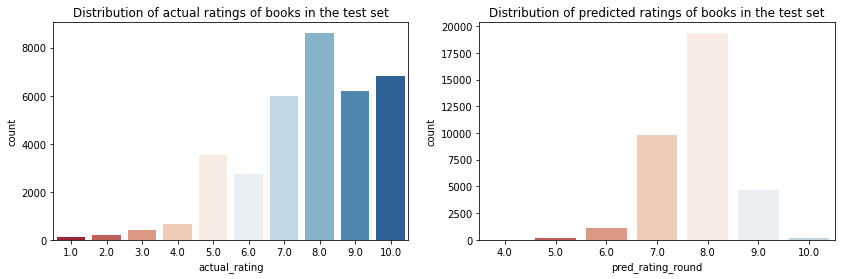

In [105]:
# Plotting actual and predicted rating
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

**Absolute error of predicted ratings**<br>
The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.
<br>
How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

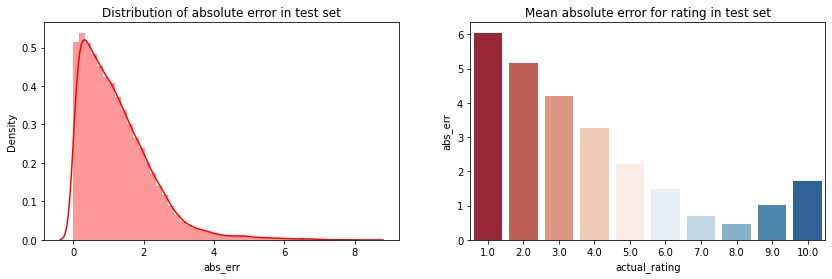

In [106]:
# Plotting mean absolute error
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='r', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

Analysis of predicted ratings of a particular user<br>
For this part of the analysis, the user with id 193458 was selected. By analyzing book ratings by this user, it can be noted that he/she likes diverse types of readings: English romantic novels (Pride and Prejudice, Sense and Sensibility), fantasy (Narnia) as well as historical novels (Schindler's List). Among the recommended books there are other works from Narnia's series, two historical novels and one romance which correlates with user's previous preferences.

In [107]:
df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

Train set: Top rated books

In [108]:
# Print data where pred rate is NaN
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

,user_id,isbn,book_rating,book_title,pred_rating
124962,193458,0671880314,9,Schindler's List,NaN
124970,193458,0887309100,9,The Dilbert Future: Thriving on Business Stupi...,NaN
124918,193458,0064471063,9,The Horse and His Boy,NaN
124930,193458,0142001740,9,The Secret Life of Bees,NaN
124963,193458,0679429220,9,Midnight in the Garden of Good and Evil: A Sav...,NaN
124923,193458,014011369X,9,"And the Band Played on: Politics, People, and ...",NaN
124924,193458,0140298479,9,Bridget Jones: The Edge of Reason,NaN
124919,193458,0064471071,9,The Voyage of the Dawn Treader (rack) (Narnia),NaN
124966,193458,0789404257,9,Eyewitness Travel Guide to Italy (revised),NaN
124926,193458,0140620125,9,Wuthering Heights (Penguin Popular Classics),NaN


Test set: predicted top rated books

In [109]:
# to print pred rating
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,book_rating,book_title,pred_rating
124920,193458,006447108X,9,The Last Battle,8.383765
124971,193458,1559703237,7,Trying to Save Piggy Sneed,8.291200
124969,193458,0887308589,8,The Dilbert Principle: A Cubicle's-Eye View of...,8.026095
124975,193458,1853260169,10,Sense and Sensibility (Wordsworth Classics),7.957054
124934,193458,0316781010,7,Fortune's Rocks: A Novel,7.921450


Test set: actual top rated books

In [110]:
# To print total pred rating without na
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

,user_id,isbn,book_rating,book_title,pred_rating
124975,193458,1853260169,10,Sense and Sensibility (Wordsworth Classics),7.957054
124920,193458,006447108X,9,The Last Battle,8.383765
124943,193458,0385474016,8,Like Water for Chocolate: A Novel in Monthly I...,7.510147
124965,193458,0767904133,8,Close to Shore: A True Story of Terror in an A...,7.813322
124969,193458,0887308589,8,The Dilbert Principle: A Cubicle's-Eye View of...,8.026095


# **Challenges** 

Handling of sparsity was a major challenge since, the user interactions were not present for the majority of the books. Understanding the metric for evaluation was a challenge as well. Since the data consisted of text data, data cleaning was a major challenge in features like Location etc. Also, we had some incorrected data for 2-3 books. Decision making on missing value imputations 
and outlier treatment was quite challenging as well.


# **Conclusion**

In EDA, the Top-10 most rated books were essentially novels. Books like The Lovely Bone and Wild Animus were very well perceived.

Majority of the readers were of the age bracket 20-35 and most of them came from USA, Canada, UK, Germany and Spain.

If we look at the ratings distribution, most of the books have high ratings with maximum books being rated 8. Ratings below 5 are few in number.

Author with the most books was Agatha Christie, William Shakespeare and Stephen King.

In popularity based recommendation, It's noticed that Most popular book and author represent Publisher Scholastic. Also, Scholastic is most popular publisher to receive maximum positive rating. However, Scholastic is 6th publisher with maximum books.  

For modelling, it was observed that for model based collaborative filtering SVD technique worked way better than NMF with lower Mean Absolute Error (MAE) .